# Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Data

In [3]:
X, y = make_blobs(n_samples = 300, centers = 4, cluster_std =  0.50, random_state = 0)

# Modeling

['y', 'b', 'g', 'r']


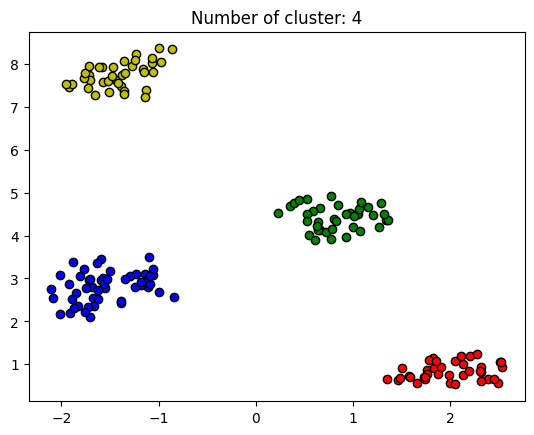

In [9]:
db = DBSCAN(eps = 0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of cluster in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
    
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = col,
        markeredgecolor = 'k',
        markersize = 6)
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = col,
        markeredgecolor = 'k',
        markersize = 6)

plt.title('Number of cluster: %d'% n_clusters_)
plt.show()

# Evaluation Metrics

In [12]:
sc = metrics.silhouette_score(X, labels)
print('Silhouette Coefficients:%0.2f' %sc)

ari = metrics.adjusted_rand_score(y, labels)
print('Adjusted Rand Index: %0.2f' %ari)

Silhouette Coefficients:0.13
Adjusted Rand Index: 0.31
